### Câu 2. Hồi quy tuyến tính (4 điểm)
Tập tin ‘IQ4.xls’ chứa những mẫu dữ liệu được thu thập về mối quan hệ giữa chỉ số IQ với điểm thi các môn học của sinh viên.

2.1) Thể hiện những thông tin của dữ liệu. Vẽ biểu đồ phân phối tần số điểm thi của các môn.

2.2) Dùng các hàm để tính các giá trị thống kê cơ bản của chỉ số IQ và điểm thi của các môn.

2.3) Xác định outlier(s), nếu có, của chỉ số IQ và điểm thi của các môn dựa trên quy tắc 3-Sigma.

2.4) Chọn điểm thi của một trong các môn để làm cơ sở cho việc dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính bằng Gradient Descent và bằng ma trận giả nghịch đảo. Trực quan hóa dữ liệu và giải thích nguyên nhân của sự lựa chọn.

2.5) Dự đoán các chỉ số IQ tương ứng với x {0.5,1.0,1.5,2.0,...,9.0,9.5,10}.

In [30]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from sklearn             import linear_model
from scipy               import stats
import warnings
warnings.filterwarnings('ignore')



## Câu 2.1: Thể hiện những thông tin của dữ liệu. Vẽ biểu đồ phân phối tần số điểm thi của các môn.

In [3]:
## Đọc tập tin IQ4.xls
f    = pd.read_excel('Data/IQ4.xls')
f.info()
f.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stt     20 non-null     int64  
 1   diem_1  20 non-null     int64  
 2   diem_2  20 non-null     float64
 3   diem_3  20 non-null     float64
 4   diem_4  20 non-null     int64  
 5   IQ      20 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.1 KB


,stt,diem_1,diem_2,diem_3,diem_4,IQ
0,1,8,2.0,7.0,7,68
1,2,8,8.4,6.4,8,137
2,3,7,7.6,7.8,8,135
3,4,8,3.0,2.5,6,79
4,5,8,4.4,3.8,6,107


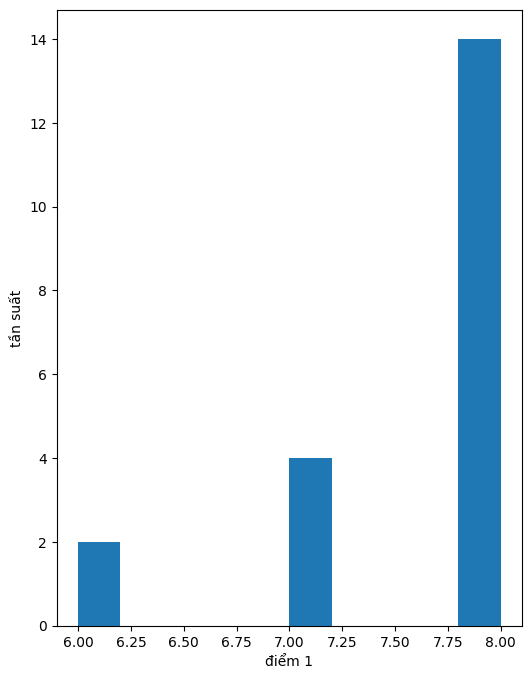

In [13]:
plt.figure( figsize = (6,8))
plt.hist(f['diem_1'])
plt.xlabel('điểm 1')
plt.ylabel('tần suất')
plt.show()

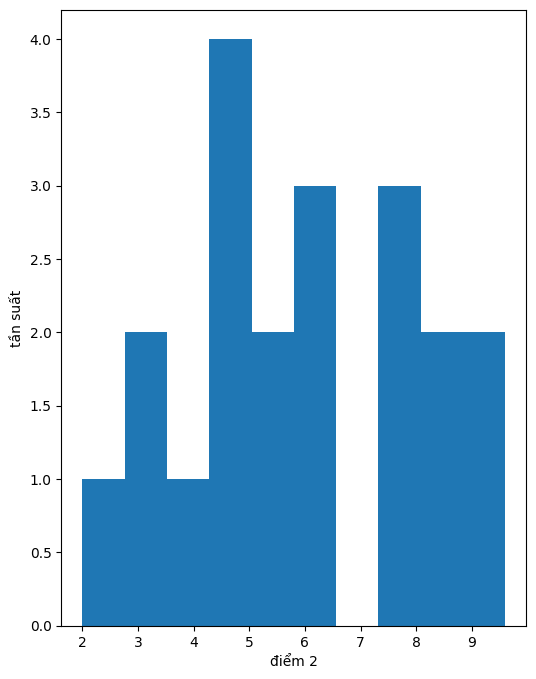

In [14]:
plt.figure( figsize = (6,8))
plt.hist(f['diem_2'])
plt.xlabel('điểm 2')
plt.ylabel('tần suất')
plt.show()

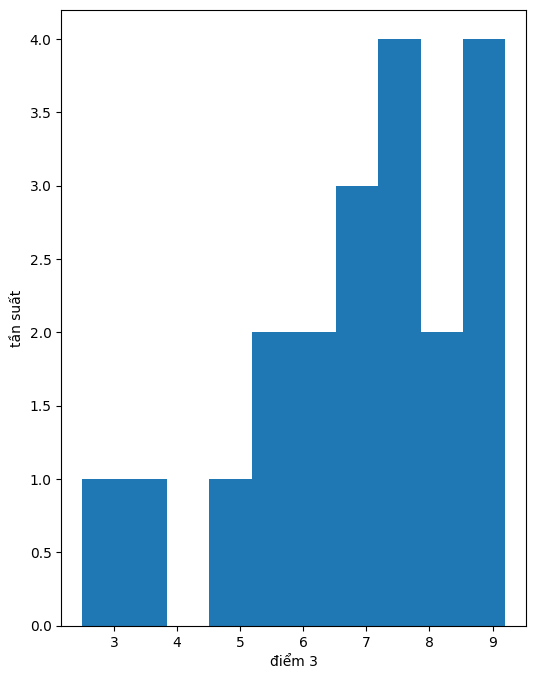

In [15]:
plt.figure( figsize = (6,8))
plt.hist(f['diem_3'])
plt.xlabel('điểm 3')
plt.ylabel('tần suất')
plt.show()

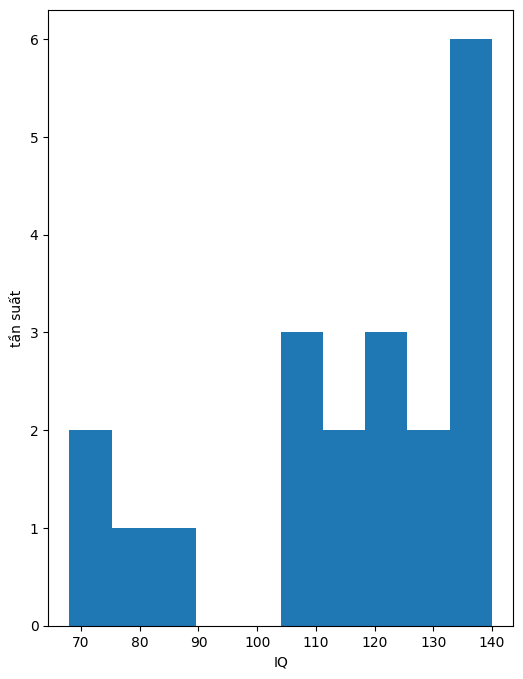

In [16]:
plt.figure( figsize = (6,8))
plt.hist(f['IQ'])
plt.xlabel('IQ')
plt.ylabel('tần suất')
plt.show()

## 2.2) Dùng các hàm để tính các giá trị thống kê cơ bản của chỉ số IQ và điểm thi của các môn.



In [40]:
#Tính giá trị thống kê của chỉ số IQ:

print("* Giá trị thống kê của chỉ số IQ") 
print("Min:", np.min(f['IQ']))
print("Max:", np.max(f['IQ']))
print("Mean:", np.mean(f['IQ']))
print("Median:", np.median(f['IQ']))
print("Std:", np.std(f['IQ']))
mode_result = stats.mode(f['IQ'])
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]

print("Mode_value:", mode_value, "\nMode_count:", mode_count)                       


* Giá trị thống kê của chỉ số IQ
Min: 68
Max: 140
Mean: 115.2
Median: 120.0
Std: 21.715432300555292
Mode_value: 110 
Mode_count: 2


In [41]:
#Tính giá trị thống kê của điểm 1:

print("* Giá trị thống kê của điểm 1") 
print("Min:", np.min(f['diem_1']))
print("Max:", np.max(f['diem_1']))
print("Mean:", np.mean(f['diem_1']))
print("Median:", np.median(f['diem_1']))
print("Std:", np.std(f['diem_1']))
mode_result = stats.mode(f['diem_1'])
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]

print("Mode_value:", mode_value, "\nMode_count:", mode_count)                       


* Giá trị thống kê của điểm 1
Min: 6
Max: 8
Mean: 7.6
Median: 8.0
Std: 0.6633249580710799
Mode_value: 8 
Mode_count: 14


In [42]:
#Tính giá trị thống kê của điểm 2:

print("* Giá trị thống kê của điểm 2") 
print("Min:", np.min(f['diem_2']))
print("Max:", np.max(f['diem_2']))
print("Mean:", np.mean(f['diem_2']))
print("Median:", np.median(f['diem_2']))
print("Std:", np.std(f['diem_2']))
mode_result = stats.mode(f['diem_2'])
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]

print("Mode_value:", mode_value, "\nMode_count:", mode_count)                       


* Giá trị thống kê của điểm 2
Min: 2.0
Max: 9.6
Mean: 5.92
Median: 5.8
Std: 2.1581473536345936
Mode_value: 4.4 
Mode_count: 2


In [43]:
#Tính giá trị thống kê của điểm 3:

print("* Giá trị thống kê của điểm 3") 
print("Min:", np.min(f['diem_3']))
print("Max:", np.max(f['diem_3']))
print("Mean:", np.mean(f['diem_3']))
print("Median:", np.median(f['diem_3']))
print("Std:", np.std(f['diem_3']))
mode_result = stats.mode(f['diem_3'])
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]

print("Mode_value:", mode_value, "\nMode_count:", mode_count)                       


* Giá trị thống kê của điểm 3
Min: 2.5
Max: 9.2
Mean: 6.859999999999999
Median: 7.1
Std: 1.7479702514631077
Mode_value: 7.2 
Mode_count: 2


In [107]:
#Tính giá trị thống kê của điểm 4:

print("* Giá trị thống kê của điểm 4") 
print("Min:", np.min(f['diem_4']))
print("Max:", np.max(f['diem_4']))
print("Mean:", np.mean(f['diem_4']))
print("Median:", np.median(f['diem_4']))
print("Std:", np.std(f['diem_4']))
mode_result = stats.mode(f['diem_4'])
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]

print("Mode_value:", mode_value, "\nMode_count:", mode_count)                       


* Giá trị thống kê của điểm 4
Min: 6
Max: 9
Mean: 7.0
Median: 7.0
Std: 0.8944271909999159
Mode_value: 6 
Mode_count: 7


## 2.3) Xác định outlier(s), nếu có, của chỉ số IQ và điểm thi của các môn dựa trên quy tắc 3-Sigma.

In [108]:
# Xác định outlier(s), nếu có, của chỉ số IQ dựa trên quy tắc 3-Sigma.

IQ_zscore = stats.zscore(f['IQ']) #dời trục z

#sigma = 3
#outliers = IQ_zscore[ [ n < (sigma *(-1)) or (n > sigma) for n in IQ_zscore]]

outliers = IQ_zscore[ [ (n < -3) or (n > 3) for n in IQ_zscore]]
outliers_index = [IQ_zscore.tolist().index(i) for i in outliers]
outliers_value = f['IQ'].iloc[outliers_index].tolist()

print('Chỉ số của outliers của IQ:', outliers_index)
print('Giá trị của outliers của IQ:', outliers_value[1:])


Chỉ số của outliers của IQ: []
Giá trị của outliers của IQ: []


In [109]:
# Xác định outlier(s), nếu có, của điểm 1 dựa trên quy tắc 3-Sigma.

IQ_zscore = stats.zscore(f['diem_1']) #dời trục z

#sigma = 3
#outliers = IQ_zscore[ [ n < (sigma *(-1)) or (n > sigma) for n in IQ_zscore]]

outliers = IQ_zscore[ [ (n < -3) or (n > 3) for n in IQ_zscore]]
outliers_index = [IQ_zscore.tolist().index(i) for i in outliers]
outliers_value = f['IQ'].iloc[outliers_index].tolist()

print('Chỉ số của outliers của điểm 1:', outliers_index)
print('Giá trị của outliers của điểm 1:', outliers_value[1:])


Chỉ số của outliers của điểm 1: []
Giá trị của outliers của điểm 1: []


In [110]:
# Xác định outlier(s), nếu có, của điểm 2 dựa trên quy tắc 3-Sigma.

IQ_zscore = stats.zscore(f['diem_2']) #dời trục z

#sigma = 3
#outliers = IQ_zscore[ [ n < (sigma *(-1)) or (n > sigma) for n in IQ_zscore]]

outliers = IQ_zscore[ [ (n < -3) or (n > 3) for n in IQ_zscore]]
outliers_index = [IQ_zscore.tolist().index(i) for i in outliers]
outliers_value = f['IQ'].iloc[outliers_index].tolist()

print('Chỉ số của outliers của điểm 2:', outliers_index)
print('Giá trị của outliers của điểm 2:', outliers_value[1:])


Chỉ số của outliers của điểm 2: []
Giá trị của outliers của điểm 2: []


In [111]:
# Xác định outlier(s), nếu có, của điểm 3 dựa trên quy tắc 3-Sigma.

IQ_zscore = stats.zscore(f['diem_3']) #dời trục z

#sigma = 3
#outliers = IQ_zscore[ [ n < (sigma *(-1)) or (n > sigma) for n in IQ_zscore]]

outliers = IQ_zscore[ [ (n < -3) or (n > 3) for n in IQ_zscore]]
outliers_index = [IQ_zscore.tolist().index(i) for i in outliers]
outliers_value = f['IQ'].iloc[outliers_index].tolist()

print('Chỉ số của outliers của điểm 3:', outliers_index)
print('Giá trị của outliers của điểm 3:', outliers_value[1:])


Chỉ số của outliers của điểm 3: []
Giá trị của outliers của điểm 3: []


In [112]:
# Xác định outlier(s), nếu có, của điểm 4 dựa trên quy tắc 3-Sigma.

IQ_zscore = stats.zscore(f['diem_4']) #dời trục z

#sigma = 3
#outliers = IQ_zscore[ [ n < (sigma *(-1)) or (n > sigma) for n in IQ_zscore]]

outliers = IQ_zscore[ [ (n < -3) or (n > 3) for n in IQ_zscore]]
outliers_index = [IQ_zscore.tolist().index(i) for i in outliers]
outliers_value = f['IQ'].iloc[outliers_index].tolist()

print('Chỉ số của outliers của điểm 4:', outliers_index)
print('Giá trị của outliers của điểm 4:', outliers_value[1:])


Chỉ số của outliers của điểm 4: []
Giá trị của outliers của điểm 4: []


## 2.4) Chọn điểm thi của một trong các môn để làm cơ sở cho việc dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính bằng Gradient Descent và bằng ma trận giả nghịch đảo. Trực quan hóa dữ liệu và giải thích nguyên nhân của sự lựa chọn.


#### Dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính bằng Gradient Descent

In [114]:
# Mức độ tương quan (Pearson correlation) giữa điểm và IQ

Cor_diem_1_IQ = np.corrcoef(f['diem_1'],f['IQ'])
print(' Mức độ tương quan giữa điểm 1 và IQ:', Cor_diem_1_IQ)

Cor_diem_2_IQ = np.corrcoef(f['diem_2'],f['IQ'])
print(' Mức độ tương quan giữa điểm 2 và IQ:', Cor_diem_2_IQ)

Cor_diem_3_IQ = np.corrcoef(f['diem_3'],f['IQ'])
print(' Mức độ tương quan giữa điểm 3 và IQ:', Cor_diem_3_IQ)

Cor_diem_4_IQ = np.corrcoef(f['diem_4'],f['IQ'])
print(' Mức độ tương quan giữa điểm 4 và IQ:', Cor_diem_4_IQ)

 Mức độ tương quan giữa điểm 1 và IQ: [[ 1.         -0.08816758]
 [-0.08816758  1.        ]]
 Mức độ tương quan giữa điểm 2 và IQ: [[1.         0.87241887]
 [0.87241887 1.        ]]
 Mức độ tương quan giữa điểm 3 và IQ: [[1.         0.47152203]
 [0.47152203 1.        ]]
 Mức độ tương quan giữa điểm 4 và IQ: [[1.         0.62297683]
 [0.62297683 1.        ]]


####  => Chọn 'điểm 2' để so sánh với chỉ số IQ

In [120]:
## Mô hình hóa phương trình đường thẳng
##    Lưu ý: Thêm 1 vào cột đầu tiên của X để có cùng số chiều với vector tham số (m, b)
X    = f['diem_2']
xHat = np.c_[np.ones(X.size), X]
y    = f['IQ']
print(xHat) 

[[1.  2. ]
 [1.  8.4]
 [1.  7.6]
 [1.  3. ]
 [1.  4.4]
 [1.  6.4]
 [1.  8. ]
 [1.  2.8]
 [1.  5.2]
 [1.  6.4]
 [1.  7.6]
 [1.  5. ]
 [1.  9.6]
 [1.  5.6]
 [1.  4.4]
 [1.  9. ]
 [1.  3.6]
 [1.  4.8]
 [1.  6. ]
 [1.  8.6]]


In [121]:
# Dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính bằng Gradient Descent

##------------------------------------------------------------------------------
## Hàm thực hiện thuật toán Gradient Descent
##------------------------------------------------------------------------------
def gradient_descent(rho, x, y, numIterations):
    # Các tham số:
    #     rho: learning rate
    #     x  : ma trận input  x = [[1 x0],[1 x1], [1  x2], ...]
    #     y  : vector  output y = [y0, y1, y2, ...]
    #     numIterations: số vòng lặp

    # Kích thước tập mẫu (training set)
    N = x.shape[0]

    # Khởi tạo (tùy ý) vector tham số cần xác định: theta = (b, m) = [1, 1]
    theta = np.ones(2)

    # Tìm cực tiểu địa phương của loss fuction (di chuyển dần dần ngược dấu đạo hàm)
    for iter in range(0, numIterations):
        yHat = np.dot(x, theta)
        loss = (yHat - y)

        # Đạo hàm của hàm J (riêng phần theo theta[0] và theta[1])
        theta0_prime = np.sum(loss)/N           # đạo hàm theo theta0
        theta1_prime = np.sum(loss * x[:,1])/N  # đạo hàm theo theta1

        gradient = np.array([theta0_prime, theta1_prime])

        # Di chuyển ngược dấu đạo hàm đến điểm mới
        theta = theta - (rho * gradient)
    return theta


In [122]:
## Áp dụng Gradient Descent để xác định theta = (b, m)
rho   = 0.001 # learning rate
theta = gradient_descent(rho, xHat, y, 10000)
print(theta)

[44.27226177 11.61352879]


In [154]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
IQ_predict_GD2 = theta[1] * X + theta[0]
print('Phương trình hồi quy tuyến tính:')
print('   IQ = (', theta[1], ') * diem_2 + (', theta[0], ')')

Phương trình hồi quy tuyến tính:
   IQ = ( 11.613528787190507 ) * diem_2 + ( 44.27226177469661 )


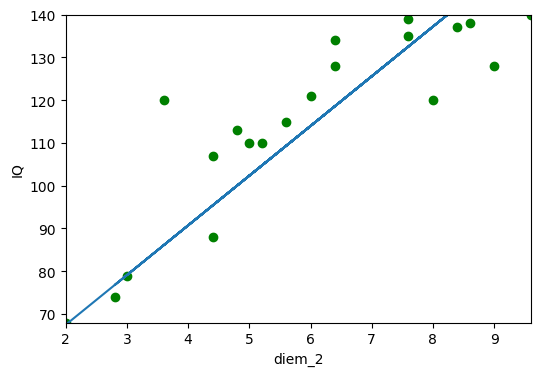

In [138]:
## Biểu diễn trực quan kết quả của Gradient Descent
plt.figure(figsize = (6, 4))
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.scatter(xHat[:,1], y, color = "green")
plt.plot(X, IQ_predict_GD2)
plt.xlabel("diem_2")
plt.ylabel("IQ")
plt.show()

#### Dự đoán các chỉ số IQ bằng ma trận giả nghịch đảo

In [139]:
# Dự đoán các chỉ số IQ bằng ma trận giả nghịch đảo

## Các ma trận
A = xHat.T @ xHat
b = xHat.T @ y

## Vector tham số
w = np.linalg.pinv(A) @ b

slope3 = w[1]
bias3  = w[0]

IQ_predict_PseudoInverse = slope3 * X + bias3
print('Phương trình hồi quy tuyến tính:')
print('   IQ = (', slope3, ') * diem_2 + (', bias3, ')')

Phương trình hồi quy tuyến tính:
   IQ = ( 8.778340776365548 ) * diem_2 + ( 63.232222603916036 )


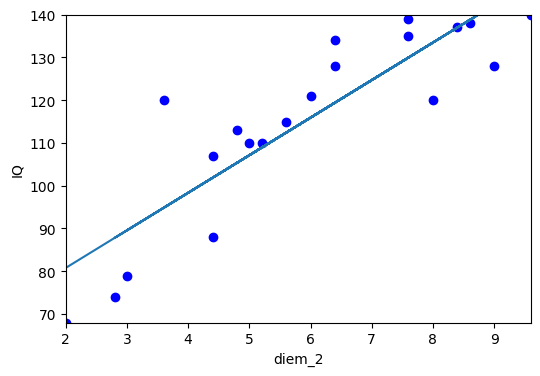

In [141]:
## Biểu diễn trực quan kết quả của Gradient Descent
plt.figure(figsize = (6, 4))
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.scatter(xHat[:,1], y, color = "blue")
plt.plot(X, IQ_predict_PseudoInverse)
plt.xlabel("diem_2")
plt.ylabel("IQ")
plt.show()

## 2.5) Dự đoán các chỉ số IQ tương ứng với x {0.5,1.0,1.5,2.0,...,9.0,9.5,10}.

In [153]:
## Các giá trị bách phân vị
percentiles = np.array([0,5,10, 15, 20, 25, 30, 35, 40, 45, 50,55, 60, 65, 70, 75,80, 85, 90, 95,100])  # trục tung
x = np.percentile(y, percentiles)       # trục hoành

x

array([ 68.  ,  73.7 ,  78.5 ,  86.65, 103.2 , 109.25, 110.  , 111.95,
       114.2 , 117.75, 120.  , 120.45, 123.8 , 128.  , 129.8 , 134.25,
       135.4 , 137.15, 138.1 , 139.05, 140.  ])

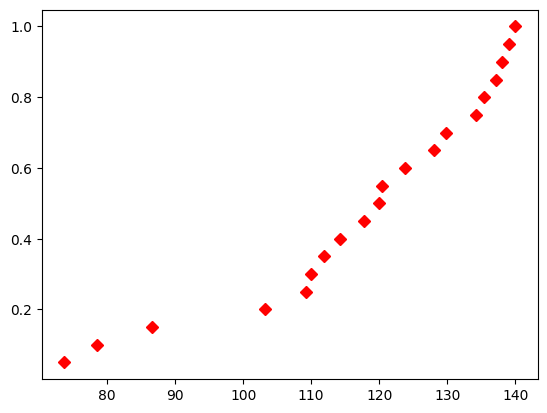

In [152]:
## Vẽ biểu đồ
plt.plot(x, percentiles/100, marker = 'D', color = 'red', linestyle = 'none')
plt.show()